In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as r2_square

In [2]:
data= pd.read_excel("air cargo supplychain.xlsx")

In [3]:
data.describe()
data

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019996,ATL,DXB,158.99,10.97,300.55,Air,UPS,36,Yes,Yes,32,Clear,Monday,Delayed
19996,SHIP019997,MIA,NRT,655.74,42.92,1239.58,Air,FedEx,46,Yes,No,28,Foggy,Friday,On-Time
19997,SHIP019998,LAX,LHR,711.80,29.54,1345.55,Air,UPS,30,Yes,No,16,Clear,Monday,On-Time
19998,SHIP019999,DFW,HKG,147.04,4.38,277.96,Rail,FedEx,16,No,No,19,Clear,Thursday,On-Time


In [4]:
data.drop(columns=['Shipment ID'], inplace=True)
data

,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,ATL,DXB,158.99,10.97,300.55,Air,UPS,36,Yes,Yes,32,Clear,Monday,Delayed
19996,MIA,NRT,655.74,42.92,1239.58,Air,FedEx,46,Yes,No,28,Foggy,Friday,On-Time
19997,LAX,LHR,711.80,29.54,1345.55,Air,UPS,30,Yes,No,16,Clear,Monday,On-Time
19998,DFW,HKG,147.04,4.38,277.96,Rail,FedEx,16,No,No,19,Clear,Thursday,On-Time


In [5]:
categorical_cols = ["Origin Airport", "Destination Airport", "Mode of Transport", "Carrier Name", 
                    "Temperature-Sensitive", "Perishable Goods", "Weather Conditions", "Day of Week","Delay Status"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Convert categorical to numeric
    label_encoders[col] = le  # Store encoders for future use

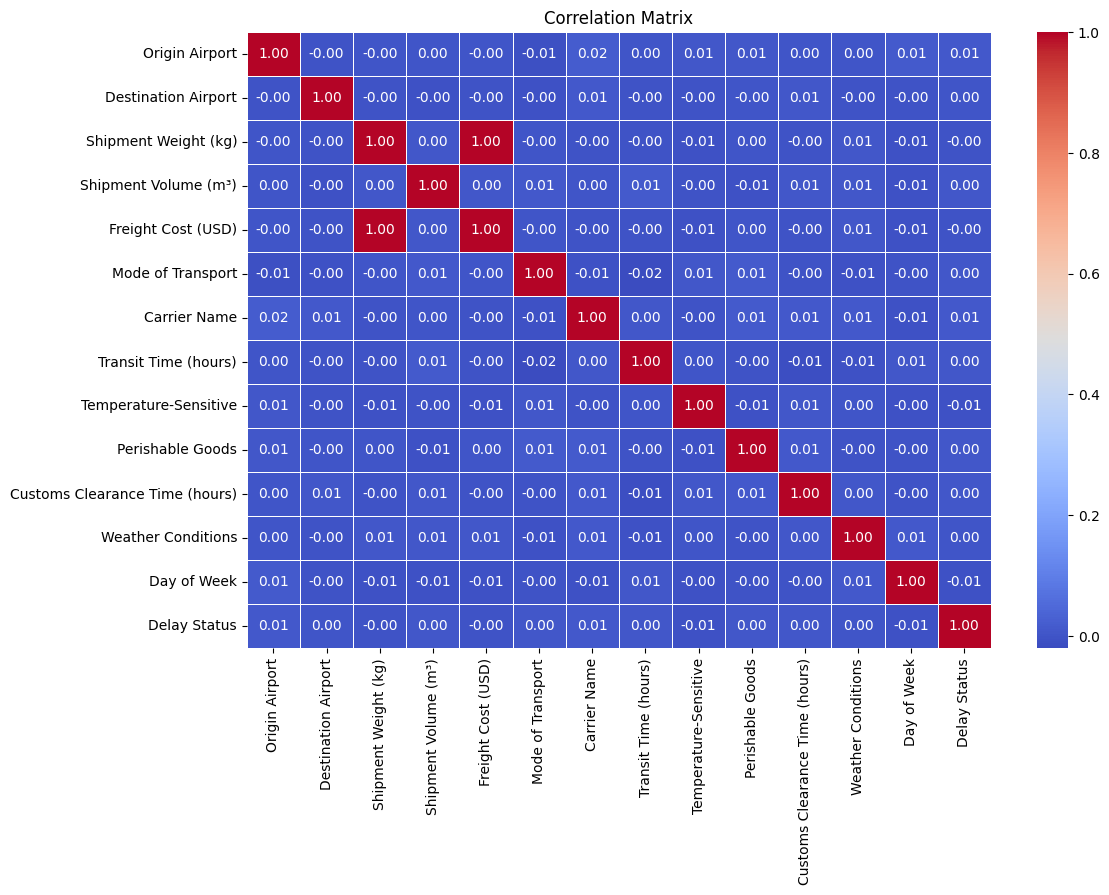

In [6]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

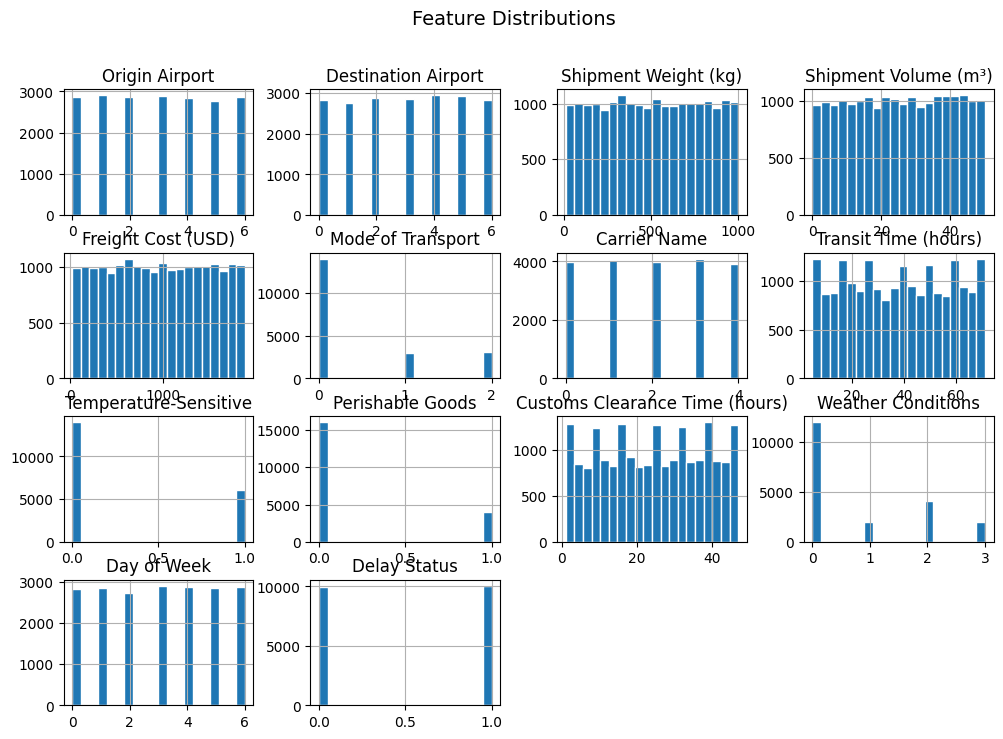

In [7]:
data.hist(figsize=(12, 8), bins=20, edgecolor='white')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

In [8]:
# Feature Engineering
data["Delay_Status"] = np.where((data["Transit Time (hours)"] > 50) | 
                              (data["Customs Clearance Time (hours)"] > 36), 1, 0)

In [9]:
data.drop(columns=['Delay Status'], inplace=True)

In [10]:
X = data.drop(columns=["Delay_Status"])
y = data["Delay_Status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.812
